<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1.1 Exercises
Zachariah Freitas

In [13]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Save this file here Module_1/Assignment_1.ipynb

## 1.1. Predicting Student Recommendation:
1.1.1. Download the student_records.csv file (located in your assignment prompt in Blackboard). <br>
1.1.2. Run all codes on the example in the lecture, Textbook 1 – Chapter 1: Page 19-28 and Page 55-64. The goal is to build a predictive model based on the dataset. The model can predict for any future student if they will be recommended for the grant based on their performance attributes. <br>
1.1.3. Write down your understanding about the codes and each part’s functioning.



### Mathematics
**Scalar**


In [14]:
x=5
x

5

**Vector**

In [15]:
# Create a vector/list.
x = [1,2,3,4,5]

# View the vector/list.
x

[1, 2, 3, 4, 5]

In [16]:
# Import numpy library that has functions that help us work in matricies.
import numpy as np
# Create an vector/array
x = np.array([1,2,3,4,5])
# View the vector/array
print(x,'\n')
# View the datatype of x
print(type(x))

[1 2 3 4 5] 

<class 'numpy.ndarray'>


**Matrix**

In [17]:
# Create a matrix
m = np.array([[1,5,2],
              [4,7,4],
              [2,0,9]])
# View the matrix
print(m)

[[1 5 2]
 [4 7 4]
 [2 0 9]]


In [18]:
# View the matrix dimensions
print(m.shape)

(3, 3)


In [19]:
# Matrix transpose
print('Matix Transpose:\n', m.transpose(), '\n')

Matix Transpose:
 [[1 4 2]
 [5 7 0]
 [2 4 9]] 



In [20]:
# Matrix determinant
# If the determinant is zero then we cannot calculate an inverse, because it would be like dividing by zero or undefined.
print('Matix Determinant:\n', np.linalg.det(m), '\n')

Matix Determinant:
 -105.00000000000006 



In [21]:
# Matrix inverse
# Why Do We Need an Inverse?
# Because with matrices we don't divide! Seriously, there is no concept of dividing by a matrix.
# But we can multiply by an inverse, which achieves the same thing.
m_inv = np.linalg.inv(m)
print('Matix Inverse:\n', m_inv, '\n')

Matix Inverse:
 [[-0.6         0.42857143 -0.05714286]
 [ 0.26666667 -0.04761905 -0.03809524]
 [ 0.13333333 -0.0952381   0.12380952]] 



In [22]:
# Identity Matrix (result of matrix * matrix_inverse)
# Check your work.
iden_m = np.dot(m, m_inv)
iden_m = np.round(np.abs(iden_m),0)
print('Product of matrix and its inverse:\n', iden_m, '\n')

Product of matrix and its inverse:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



### Eigen Decomposition
Matrix decomposition technique.

In [23]:
# Create Matrix Array
m = np.array([[1,5,2],
              [4,7,4],
              [2,0,9]])

# Do eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(m)

# View the eigan values and eigan vectors
print('Eigan Values:\n', eigen_vals, '\n')
print('Eigan Vectors:\n', eigen_vecs, '\n')

Eigan Values:
 [-1.32455532 11.32455532  7.        ] 

Eigan Vectors:
 [[-0.91761521  0.46120352 -0.46829291]
 [ 0.35550789  0.79362022 -0.74926865]
 [ 0.17775394  0.39681011  0.46829291]] 



### Singular Value Decomposition (SVD)
Another matrix decomposistion technique.

$M_{m \times n} = U_{m \times m} S_{m \times n} V^T_{n \times n}$ <br>
Where: <br>
$ m = rows $ <br>
$ n = columns $

In [24]:
# SVD
# Create Matrix Array
m = np.array([[1,5,2],
              [4,7,4],
              [2,0,9]])

# Do the SVD function
U, S, VT = np.linalg.svd(m)

# View the SVD outputs
print('Getting SVD outputs:\n')
print('U:\n',U,'\n')
print('S:\n',S,'\n')
print('VT:\n',VT,'\n')

Getting SVD outputs:

U:
 [[ 0.3831556  -0.39279153  0.83600634]
 [ 0.68811254 -0.48239977 -0.54202545]
 [ 0.61619228  0.78294653  0.0854506 ]] 

S:
 [12.10668383  6.91783499  1.25370079] 

VT:
 [[ 0.36079164  0.55610321  0.74871798]
 [-0.10935467 -0.7720271   0.62611158]
 [-0.92621323  0.30777163  0.21772844]] 



### Statistics

In [25]:
# Descriptive Statistics
import scipy as sp
import numpy as np
from scipy import stats


# Get the data
nums = np.random.randint(1,20, size=(1,15))[0]
print('Data: ', nums)

Data:  [18  9 12 12  2 12  7  5  4 17 11 14  6  4  7]


In [26]:
# get descriptive stats
print('Mean:', np.mean(nums))
print('Median:', np.median(nums))
print('Mode:', float(stats.mode(nums)[0]))
print('Standard Deviation:', np.std(nums))
print('Variance:', np.var(nums))
print('Skew:', sp.stats.skew(nums))
print('Kurtosis:', sp.stats.kurtosis(nums))


Mean: 9.333333333333334
Median: 9.0
Mode: 12.0
Standard Deviation: 4.6998817952038845
Variance: 22.088888888888892
Skew: 0.27170796220182813
Kurtosis: -0.9811160726937085


### Natural Language Processing (NLP)
I struggled to get this to work.

In [27]:
from nltk.parse.stanford import StanfordParser
nltk.download('all', halt_on_error=False)
sentence = 'The quick brown fox jumps over the lazy dog'

NameError: ignored

In [ ]:
#from nltk.parse import CoreNLPParser
#parser = CoreNLPParser()
#parser.parse_sents(...)
#parser.raw_parse(...)
#parser.raw_parse_sents(...)
#*deprecated*
# *deprecated*
# parser.parse_text()

In [ ]:
from nltk.parse import CoreNLPParser
scp = StanfordParser(path_to_jar='E:/stanford/standford-parser-full-2015-04-20/standford-parser.jar', path_to_models_jar='E:/stanford/standford-parser-full-2015-04-20/standford-parser-3.5.2-models.jar')

In [ ]:
# Create parser object
#scp = StanfordParser(path_to_jar='E:/stanford/standford-parser-full-2015-04-20/standford-parser.jar', 
#                      path_to_models_jar='E:/stanford/standford-parser-full-2015-04-20/standford-parser-3.5.2-models.jar')

### Real-World Case Study: Predicting Student Grant Recomendations
**Data Retrieval**

In [29]:
# Copy of data in my github for perputuity. 
import pandas as pd
# Turn off warning messages
pd.options.mode.chained_assignment = None # default = 'warn'

# Get data
sr_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_1/student_records.csv')
sr_df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


**Data Preparation** <br>
**Feature Extraction and Engineering**

In [47]:
# Get Features and corresponding outcomes
feature_names = ['OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore']
training_features = sr_df[feature_names]
outcome_name = ['Recommend']
outcome_labels = sr_df[outcome_name]

# View features
training_features

# Normally I would create a test train split using the following code but this example dosn't require it.
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(training_features,outcome_labels,test_size=0.2)


,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [48]:
# View outcome labels
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [49]:
# List down features based on type
numeric_feature_names = [ 'ResearchScore', 'ProjectScore']
categorical_feature_names = ['OverallGrade', 'Obedient']

In [50]:
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()

# fit scaler on numeric features
ss.fit(training_features[numeric_feature_names])

# scale numeric fearures now
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])

# View updated featureset
training_features


,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


In [51]:
# Create dummy variables from categorical features.
training_features = pd.get_dummies(training_features, columns = categorical_feature_names)

# View newly engineered features.
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [52]:
# Get a list of newly created categorical fearures
categorical_engineered_features = list(set(training_features.columns) - set(numeric_feature_names))
# View new category feature column names
categorical_engineered_features

['OverallGrade_C',
 'OverallGrade_A',
 'OverallGrade_F',
 'Obedient_N',
 'OverallGrade_E',
 'OverallGrade_B',
 'Obedient_Y']

**Modeling**

In [53]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#fit the model
lr = LogisticRegression()


model = lr.fit(training_features, np.array(outcome_labels['Recommend']))

# View the parameters
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Model Evaluation**

In [54]:
 # simple evaluation on training data
pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])

# evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy:', float(accuracy_score(actual_labels, pred_labels))*100, '%')
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))

Accuracy: 100.0 %
Classification Stats:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



**Model Deployment**

In [55]:
# from sklearn.externals import joblib
import joblib
import os

# save models to be deployed on your server
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/Model'):
  os.mkdir('/content/drive/MyDrive/Colab Notebooks/Model')
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/Scaler'):
  os.mkdir('/content/drive/MyDrive/Colab Notebooks/Scaler') 

# Create a pickle file
# Pickling is a process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
joblib.dump(model, r'/content/drive/MyDrive/Colab Notebooks/Model/model.pickle') 
joblib.dump(ss, r'/content/drive/MyDrive/Colab Notebooks/Scaler/scaler.pickle')

['/content/drive/MyDrive/Colab Notebooks/Scaler/scaler.pickle']

**Prediction in Action**

In [56]:
# load model and scaler objects
model = joblib.load(r'/content/drive/MyDrive/Colab Notebooks/Model/model.pickle')
scaler = joblib.load(r'/content/drive/MyDrive/Colab Notebooks/Scaler/scaler.pickle')

In [57]:
## data retrieval
new_data = pd.DataFrame([{'Name': 'Nathan', 'OverallGrade': 'F', 
                          'Obedient': 'N', 'ResearchScore': 30, 'ProjectScore': 20},
                          {'Name': 'Thomas', 'OverallGrade': 'A',
                           'Obedient': 'Y', 'ResearchScore': 78, 'ProjectScore': 80}])
 
new_data = new_data[['Name', 'OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore']]
 
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore
0,Nathan,F,N,30,20
1,Thomas,A,Y,78,80


In [58]:
## Since we don't have new data I'm just going to use our original data set for simplication of this task.
# in the future I would use a test set or have a truely new dataset.
new_data = sr_df
## New data preparation
prediction_features = new_data[feature_names]

# scaling
prediction_features[numeric_feature_names] = scaler.transform(prediction_features[numeric_feature_names])

# engineering categorical variables
prediction_features = pd.get_dummies(prediction_features, columns=categorical_feature_names)
 
# view feature set
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [59]:
# add missing categorical feature columns
current_categorical_engineered_features = set(prediction_features.columns) - set(numeric_feature_names)
missing_features = set(categorical_engineered_features) - current_categorical_engineered_features
for feature in missing_features:
  # add zeros since feature is absent in these data samples
  prediction_features[feature] = [0] * len(prediction_features) 

# view final feature set
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [60]:
## predict using model
predictions = model.predict(prediction_features)
  
## display results
new_data['Recommend'] = predictions

new_data


,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [61]:
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [62]:
sr_df.columns

Index(['Name', 'OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore',
       'Recommend'],
      dtype='object')

In [63]:
sr_df.head()

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No


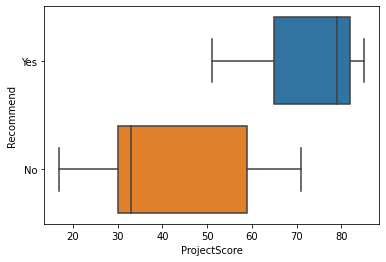

In [64]:
ProjectScore = sns.boxplot(x="ProjectScore", y="Recommend", data = sr_df, orient = 'horizontal')
plt.show()

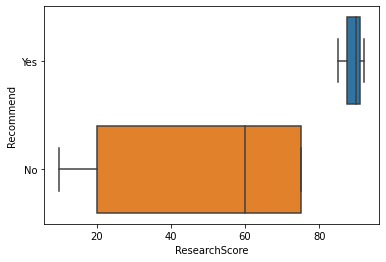

In [65]:
ResearchScore = sns.boxplot(x="ResearchScore", y="Recommend", data = sr_df, orient = 'horizontal')
plt.show()

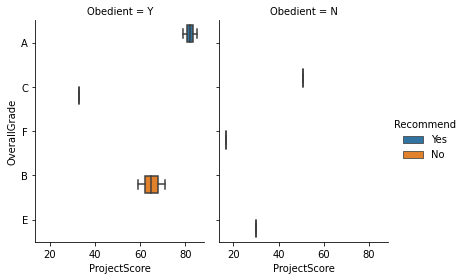

In [66]:
g = sns.catplot(x="ProjectScore", y="OverallGrade",
                hue="Recommend", col="Obedient",
                data=sr_df, kind="box",
                height=4, aspect=.7);

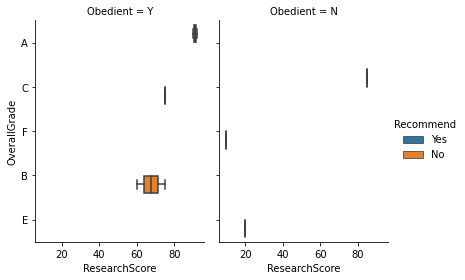

In [67]:
g = sns.catplot(x="ResearchScore", y="OverallGrade",
                hue="Recommend", col="Obedient",
                data=sr_df, kind="box",
                height=4, aspect=.7);

## 1.2. Introducing the Python Machine Learning Ecosystem:
1.2.1. Download the simplemaps-worldcities-basic.csv file (located in your assignment prompt in Blackboard). <br>
1.2.2. Run all codes on the example in the lecture, Textbook 1 – Chapter 2: Page 75-112. The goal is to build a predictive model based on the dataset. The model can predict for any future student if they will be recommended for the grant based on their performance attributes. <br>
1.2.3. Write down your understanding about the codes and each part’s functioning. <br>


### Numpy ndarray

In [68]:
import numpy as np
arr = np.array([1,3,4,5,6])
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [1 3 4 5 6] 

Array Dimensions: (5,) 

Data Type: int64


In [69]:
arr = np.array([1,'st','er',3])
print('Data Type:', arr.dtype)

Data Type: <U21


In [70]:
# This mixed array type can't be summed.  Here is the error.
np.sum(arr)

TypeError: ignored

#### Creating Arrays

In [71]:
arr = np.array([[1,2,3],[2,4,6],[8,8,8]])
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[1 2 3]
 [2 4 6]
 [8 8 8]] 

Array Dimensions: (3, 3) 

Data Type: int64


In [72]:
# np.zeros: Creates a matrix of specified dimensions containing only zeroes:
arr = np.zeros((2,4))
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

Array Dimensions: (2, 4) 

Data Type: float64


In [73]:
# np.ones: Creates a matrix of specified dimension containing only ones:
arr = np.ones((2,4))
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

Array Dimensions: (2, 4) 

Data Type: float64


In [74]:
# np.identity: Creates an identity matrix of specified dimensions
arr = np.identity(3)
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Array Dimensions: (3, 3) 

Data Type: float64


In [75]:
# np.identity:  Create an array of a specified dimension with random values. 
arr = np.random.randn(3,4)
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[ 0.28517983 -0.85844047  0.29405837 -0.457783  ]
 [ 1.03474692  0.34852196  0.13692904 -2.94248101]
 [ 0.50565654  1.62447728 -0.75574309  0.49227786]] 

Array Dimensions: (3, 4) 

Data Type: float64


In [76]:
# Create an array of nan values.
arr = np.empty((3,3))
arr[:] = np.nan # or I could use: arr.fill(np.nan)
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]] 

Array Dimensions: (3, 3) 

Data Type: float64


In [77]:
# genfromtxt:  Create an array from delimited text. There are better ways to import data.
import io
b = io.BytesIO(b"2,23,33\n32,42,63.4\n35,77,12")
arr = np.genfromtxt(b, delimiter=",")
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[ 2.  23.  33. ]
 [32.  42.  63.4]
 [35.  77.  12. ]] 

Array Dimensions: (3, 3) 

Data Type: float64


#### Accessing Array Elements

#### Basic Indexing and Slicing

In [78]:
# Grab the second row of a two dimensional array.
arr[1]

array([32. , 42. , 63.4])

In [79]:
# Create a three dimensional array
arr = np.arange(12).reshape(2,2,3)
print('View the Array:', '\n', arr,'\n')
print('Array Dimensions:', arr.shape,'\n') 
print('Data Type:', arr.dtype)

View the Array: 
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]] 

Array Dimensions: (2, 2, 3) 

Data Type: int64


In [80]:
# We get the first dimension of the 3 dimensional array.
arr[0]

array([[0, 1, 2],
       [3, 4, 5]])

In [81]:
# Create a one dimensional array with 10 values ranging from 0 to 9.
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
# Slice the array to get the last 5 values.
arr[5:]

array([5, 6, 7, 8, 9])

In [83]:
# Slice the array to get values 5 thru 7,
arr[5:8]

array([5, 6, 7])

In [84]:
# Slice the array to get the first 5 values
arr[:-5]

array([0, 1, 2, 3, 4])

In [85]:
# Create a three dimensional array with 12 values ranging from 0 to 11.
arr = np.arange(12).reshape(2,2,3)
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [86]:
# Slice the array to get the second and third dimension
arr[1:2]

array([[[ 6,  7,  8],
        [ 9, 10, 11]]])

In [87]:
arr = np.arange(27).reshape(3,3,3)
arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [88]:
# Slice the array to get the third column. Version 1
arr[:,:,2]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [89]:
# Slice the array to get the third column. Version 2
arr[...,2]

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

#### Advanced Indexing <br>
**Integer array indexing:**

In [90]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [91]:
# Indexing an array with multiple coordinate pairs [[Rows/Dimension One],[Columns/Dimension Two]]
arr[[0,1,2],[1,0,0]]

array([1, 3, 6])

**Boolean indexing:**

In [92]:
# Create an array of names and random numbers
cities = np.array(["delhi","bangalore","mumbai","chennai","bhopal"])
city_data = np.random.randn(5,3)
city_data

array([[-1.44364581,  0.89084906, -0.88351529],
       [ 0.45576234, -0.59805142, -0.59541903],
       [-0.11587575,  1.42424037,  1.14593988],
       [ 1.04777785,  0.49166673, -0.55769897],
       [ 0.70634822, -0.42437765, -0.73070599]])

In [93]:
# Get the random array values with the same integer placement as "delhi" in the cities array.
city_data[cities =="delhi"]

array([[-1.44364581,  0.89084906, -0.88351529]])

In [94]:
# Select the greater than zero elements of an array.
city_data[city_data > 0]

array([0.89084906, 0.45576234, 1.42424037, 1.14593988, 1.04777785,
       0.49166673, 0.70634822])

In [95]:
# Now let replace the values above with zero. Now the matrix should only have values that are zero or less.
city_data[city_data >0] = 0
city_data

array([[-1.44364581,  0.        , -0.88351529],
       [ 0.        , -0.59805142, -0.59541903],
       [-0.11587575,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.55769897],
       [ 0.        , -0.42437765, -0.73070599]])

#### Operations on Arrays

In [96]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [97]:
# add 5 to every element in the array
arr + 5

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [98]:
# Multiply every element in the array by 2.
arr * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28]])

In [99]:
# Add two arrays together element-wise. Repeatedly adds on non shared dimensions. This is known as broadcasting.
arr1 = np.arange(15).reshape(5,3)
arr2 = np.arange(5).reshape(5,1)
print('Results of arr2 + arr1:','\n',arr2 + arr1,'\n')
print('arr1:','\n',arr1,'\n')
print('arr2:','\n',arr2,'\n')

Results of arr2 + arr1: 
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]
 [16 17 18]] 

arr1: 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

arr2: 
 [[0]
 [1]
 [2]
 [3]
 [4]] 



In [100]:
# Create a 5 by 3 array.
arr1 = np.random.randn(5,3)
arr1

array([[ 0.52905288,  0.14193247, -0.54137118],
       [ 0.73831135, -0.49979345,  0.99274455],
       [ 0.47000515,  0.35653476,  0.24003123],
       [ 0.42531813, -0.16881849, -0.44117591],
       [ 0.87456587, -1.11852639,  0.90965696]])

In [101]:
# The function modf will return the fractional and the integer part of the input supplied to it. Output is two seperate arrays.
np.modf(arr1)

(array([[ 0.52905288,  0.14193247, -0.54137118],
        [ 0.73831135, -0.49979345,  0.99274455],
        [ 0.47000515,  0.35653476,  0.24003123],
        [ 0.42531813, -0.16881849, -0.44117591],
        [ 0.87456587, -0.11852639,  0.90965696]]), array([[ 0.,  0., -0.],
        [ 0., -0.,  0.],
        [ 0.,  0.,  0.],
        [ 0., -0., -0.],
        [ 0., -1.,  0.]]))

#### Linear Algebra Using numpy

In [102]:
# Create two matrices.
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[9,8,7],[6,5,4],[1,2,3]])

# Compute teh dot product of matrices
A.dot(B)

array([[ 24,  24,  24],
       [ 72,  69,  66],
       [120, 114, 108]])

In [103]:
# Create a matrix
A = np.arange(15).reshape(3,5)

# Get the transposed matrix of matrix A
A.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [104]:
# View Origingal A
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [105]:
# Calculate the SVD of matrix A
U, S, VT = np.linalg.svd(A)
print('U:','\n',U,'\n')
print('S:','\n',S,'\n')
print('VT:','\n',VT,'\n')

U: 
 [[-0.15425367  0.89974393  0.40824829]
 [-0.50248417  0.28432901 -0.81649658]
 [-0.85071468 -0.3310859   0.40824829]] 

S: 
 [3.17420265e+01 2.72832424e+00 8.10792259e-16] 

VT: 
 [[-0.34716018 -0.39465093 -0.44214167 -0.48963242 -0.53712316]
 [-0.69244481 -0.37980343 -0.06716206  0.24547932  0.55812069]
 [ 0.49916309 -0.8355069   0.19887686  0.1121146   0.02535234]
 [-0.30036899 -0.03396104  0.33716014  0.62903881 -0.63186892]
 [-0.24620048 -0.02783651  0.80422076 -0.54013007  0.0099463 ]] 



In [107]:
import scipy.linalg as la
reconstruct_A = (U @ la.diagsvd(S,* A.shape) @ VT)

# Check if the solution is correct using the np.allclose function.
# Check to see if reconstruct_A matches the original A. This function returns True if two arrays are element-wise equal within a tolerance.
np.allclose(A,reconstruct_A)

True

In [108]:
# solve a system of equations
a = np.array([[7,5,-3], [3,-5,2],[5,3,-7]])
b = np.array([16,-8,0])
x = np.linalg.solve(a, b)
x

array([1., 3., 2.])

In [109]:
# Check if the solution is correct using the np.allclose function.
np.allclose(np.dot(a, x), b)

True

### Pandas

#### Data Retrieval

In [110]:
# List of Dictionaries to Dataframe
import pandas as pd
d = [{'city':'Delhi',"data":1000},
{'city':'Bangalore',"data":2000},
{'city':'Mumbai',"data":1000}]
pd.DataFrame(d)

,city,data
0,Delhi,1000
1,Bangalore,2000
2,Mumbai,1000


In [111]:
# CSV Files to Dataframe
import pandas as pd
city_data = pd.read_csv(filepath_or_buffer='https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_1/simplemaps-worldcities-basic.csv')
city_data.head(n=10)

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
5,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
6,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar
7,Taloqan,Taloqan,36.729999,69.540004,64256.0,Afghanistan,AF,AFG,Takhar
8,Mahmud-E Eraqi,Mahmud-E Eraqi,35.016696,69.333301,7407.0,Afghanistan,AF,AFG,Kapisa
9,Mehtar Lam,Mehtar Lam,34.650000,70.166701,17345.0,Afghanistan,AF,AFG,Laghman


In [112]:
# Databases to Dataframe (Example only, not executable)
# server = 'xxxxxxxx' # Address of the database server
# user = 'xxxxxx' # the username for the database server
# password = 'xxxxx' # Password for the above user
# database = 'xxxxx' # Database in which the table is present
# conn = pymssql.connect(server=server, user=user, password=password, database=database)
# query = "select * from some_table"
# df = pd.read_sql(query, conn)

#### Data Access

In [113]:
# Head and Tail
city_data.tail()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
7317,Mutare,Mutare,-18.970019,32.650038,216785.0,Zimbabwe,ZW,ZWE,Manicaland
7318,Kadoma,Kadoma,-18.330006,29.909947,56400.0,Zimbabwe,ZW,ZWE,Mashonaland West
7319,Chitungwiza,Chitungwiza,-18.000001,31.100003,331071.0,Zimbabwe,ZW,ZWE,Harare
7320,Harare,Harare,-17.817790,31.044709,1557406.5,Zimbabwe,ZW,ZWE,Harare
7321,Bulawayo,Bulawayo,-20.169998,28.580002,697096.0,Zimbabwe,ZW,ZWE,Bulawayo


In [114]:
# Slicing and Dicing
series_es = city_data.lat
type(series_es)

pandas.core.series.Series

In [115]:
# get every two rows by index starting with 10
series_es[1:10:2]

1    34.516701
3    31.112001
5    32.850000
7    36.729999
9    34.650000
Name: lat, dtype: float64

In [116]:
# Get row indexes 0 to 6.
series_es[:7]

0    34.983000
1    34.516701
2    31.582998
3    31.112001
4    32.633298
5    32.850000
6    34.866000
Name: lat, dtype: float64

In [117]:
# Get me the first seven rows 7322 - 7315 = 7
series_es[:-7315]

0    34.983000
1    34.516701
2    31.582998
3    31.112001
4    32.633298
5    32.850000
6    34.866000
Name: lat, dtype: float64

In [118]:
# Get row indexes 0 to 6.
city_data[:7]

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
5,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
6,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar


In [119]:
# Get the first 5 rows and the first 4 columns.
city_data.iloc[:5,:4]

,city,city_ascii,lat,lng
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300
1,Chaghcharan,Chaghcharan,34.516701,65.250001
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000
3,Zaranj,Zaranj,31.112001,61.886998
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699


In [120]:
# get the long lats for cities where the cities that have population of more than 10 million and selected columns all start with the letter l:
city_data[city_data['pop'] > 10000000][city_data.columns[pd.Series(city_data.columns).str.startswith('l')]]

,lat,lng
360,-34.602502,-58.397531
1171,-23.558680,-46.625020
2068,31.216452,121.436505
3098,28.669993,77.230004
3110,19.016990,72.856989
3492,35.685017,139.751407
4074,19.442442,-99.130988
4513,24.869992,66.990009
5394,55.752164,37.615523
6124,41.104996,29.010002


In [121]:
# Keep all row where values are greater thn 10 million but only show values where pop is greater than 15 million
import numpy as np
# Get data with pop greater than 10 million
city_greater_10mil = city_data[city_data['pop'] > 10000000]
# Show only values where pop is greater than 15 million.
city_greater_10mil.where(city_greater_10mil['pop'] > 15000000)

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3110,Mumbai,Mumbai,19.016990,72.856989,15834918.0,India,IN,IND,Maharashtra
3492,Tokyo,Tokyo,35.685017,139.751407,22006299.5,Japan,JP,JPN,Tokyo
4074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Operations

Values Attribute 

In [122]:
# create an 8 row and 3 column dataframe with randomly generated values and name the columns from a list of values.
df = pd.DataFrame(np.random.randn(8, 3),
columns=['A', 'B', 'C'])
df

,A,B,C
0,0.160266,0.907232,-1.706682
1,-1.040028,-1.276575,-0.216881
2,-0.204587,0.368157,1.106495
3,-1.577233,-1.958973,-1.051830
4,-0.875315,-2.580037,0.963465
5,-0.810879,0.242895,0.295690
6,-1.058735,-0.489591,-0.390487
7,-0.111109,0.481348,0.032616


Missing Data and the fillna Function

In [123]:
# In index 4 and col 3 put a missing value NaN
df.iloc[4,2] = np.NAN
df

,A,B,C
0,0.160266,0.907232,-1.706682
1,-1.040028,-1.276575,-0.216881
2,-0.204587,0.368157,1.106495
3,-1.577233,-1.958973,-1.051830
4,-0.875315,-2.580037,NaN
5,-0.810879,0.242895,0.295690
6,-1.058735,-0.489591,-0.390487
7,-0.111109,0.481348,0.032616


In [124]:
# replace missing value with 0
df.fillna (0)

,A,B,C
0,0.160266,0.907232,-1.706682
1,-1.040028,-1.276575,-0.216881
2,-0.204587,0.368157,1.106495
3,-1.577233,-1.958973,-1.051830
4,-0.875315,-2.580037,0.000000
5,-0.810879,0.242895,0.295690
6,-1.058735,-0.489591,-0.390487
7,-0.111109,0.481348,0.032616


Descriptive Statistics Functions

In [125]:
# Take the average of columns lat, lng, and pop.
columns_numeric = ['lat','lng','pop']
city_data[columns_numeric].mean()

lat        20.662876
lng        10.711914
pop    265463.071633
dtype: float64

In [126]:
# Add columns lat, lng, and pop.
city_data[columns_numeric].sum()

lat    1.512936e+05
lng    7.843263e+04
pop    1.943721e+09
dtype: float64

In [127]:
# Count the number of rows for columns lat, lng, and pop.
city_data[columns_numeric].count()

lat    7322
lng    7322
pop    7322
dtype: int64

In [128]:
# Get the median of each of the columns lat, lng, and pop.
city_data[columns_numeric].median()

lat       26.792730
lng       18.617509
pop    61322.750000
dtype: float64

In [129]:
# Get the 80 percentile for each of the columns
city_data[columns_numeric].quantile(0.8)

lat        46.852480
lng        89.900018
pop    269210.000000
Name: 0.8, dtype: float64

In [130]:
# Sum the columns for each row
city_data[columns_numeric].sum(axis = 1)

0       3.095116e+03
1       1.509977e+04
2       2.016419e+05
3       4.994400e+04
4       1.009850e+04
            ...     
7317    2.167987e+05
7318    5.641158e+04
7319    3.310841e+05
7320    1.557420e+06
7321    6.971044e+05
Length: 7322, dtype: float64

In [131]:
# Get summary statistics for the three columns in the dataframe.
city_data[columns_numeric].describe()

,lat,lng,pop
count,7322.000000,7322.000000,7.322000e+03
mean,20.662876,10.711914,2.654631e+05
std,29.134818,79.044615,8.287622e+05
min,-89.982894,-179.589979,-9.900000e+01
25%,-0.324710,-64.788472,1.734425e+04
50%,26.792730,18.617509,6.132275e+04
75%,43.575448,73.103628,2.001726e+05
max,82.483323,179.383304,2.200630e+07


#### Concatenating Dataframes

Concatenating Using the concat Method

In [132]:
# Union the two dataframes
city_data1 = city_data.sample(3)
city_data2 = city_data.sample(3)
city_data_combine = pd.concat([city_data1,city_data2])
city_data_combine

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
6094,Sivas,Sivas,39.745415,37.034990,245801.5,Turkey,TR,TUR,Sivas
4309,Matagalpa,Matagalpa,12.917078,-85.916653,106514.5,Nicaragua,NI,NIC,Matagalpa
5437,Jizan,Jizan,16.906551,42.556565,100397.0,Saudi Arabia,SA,SAU,Jizan
3639,Al Ahmadi,Al Ahmadi,29.076945,48.083773,68763.0,Kuwait,KW,KWT,Al Ahmadi
770,Nata,Nata,-20.209478,26.190019,2492.5,Botswana,BW,BWA,Central
355,Mendoza,Mendoza,-32.883330,-68.816611,827815.0,Argentina,AR,ARG,Mendoza


In [133]:
df1 = pd.DataFrame({'col1': ['col10', 'col11', 'col12', 'col13'],
                    'col2': ['col20', 'col21', 'col22', 'col23'],
                    'col3': ['col30', 'col31', 'col32', 'col33'],
                    'col4': ['col40', 'col41', 'col42', 'col43']},index=[0, 1, 2, 3])
df1

,col1,col2,col3,col4
0,col10,col20,col30,col40
1,col11,col21,col31,col41
2,col12,col22,col32,col42
3,col13,col23,col33,col43


In [134]:
df4 = pd.DataFrame({'col2': ['col22', 'col23', 'col26', 'col27'],
                    'Col4': ['Col42', 'Col43', 'Col46', 'Col47'],
                    'col6': ['col62', 'col63', 'col66', 'col67']}, index=[2, 3, 6, 7])

# Merge data with similar row index and column names.
pd.concat([df1,df4], axis=1)

,col1,col2,col3,col4,col2,Col4,col6
0,col10,col20,col30,col40,NaN,NaN,NaN
1,col11,col21,col31,col41,NaN,NaN,NaN
2,col12,col22,col32,col42,col22,Col42,col62
3,col13,col23,col33,col43,col23,Col43,col63
6,NaN,NaN,NaN,NaN,col26,Col46,col66
7,NaN,NaN,NaN,NaN,col27,Col47,col67


Database Style Concatenations Using the merge Command

In [135]:
country_data = city_data[['iso3','country']].drop_duplicates()
country_data.shape

(223, 2)

In [136]:
country_data.head()

,iso3,country
0,AFG,Afghanistan
33,ALD,Aland
34,ALB,Albania
60,DZA,Algeria
111,ASM,American Samoa


In [137]:
# Delete Country column
del(city_data['country'])
# left join country using the iso3 column as the key.
city_data.merge(country_data, 'inner').head()

,city,city_ascii,lat,lng,pop,iso2,iso3,province,country
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,AF,AFG,Badghis,Afghanistan
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,AF,AFG,Ghor,Afghanistan
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,AF,AFG,Hilmand,Afghanistan
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,AF,AFG,Nimroz,Afghanistan
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,AF,AFG,Uruzgan,Afghanistan


#### Scikit-learn Example: Regression Models

In [138]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
y = diabetes.target
X = diabetes.data
X.shape


(442, 10)

In [139]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [140]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [141]:
feature_names=['age', 'sex', 'bmi', 'bp',
               's1', 's2', 's3', 's4', 's5', 's6']


In [142]:
from sklearn import datasets
from sklearn.linear_model import Lasso
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [143]:
diabetes = datasets.load_diabetes()
X_train = diabetes.data[:310]
y_train = diabetes.target[:310]

X_test = diabetes.data[310:]
y_test = diabetes.data[310:]

In [144]:
# Set the random_state of lasso to zero.
lasso = Lasso(random_state=0)
# Create 30 values in a logspace from ln(-4) to ln(-0.5)
alphas = np.logspace(-4, -0.5, 30)

In [145]:
estimator = GridSearchCV(lasso, dict(alpha=alphas))

In [146]:
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(random_state=0),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])})

In [147]:
estimator.best_score_

0.46170948106181975

In [148]:
estimator.best_estimator_

Lasso(alpha=0.07880462815669913, random_state=0)

In [149]:
estimator.predict(X_test)

array([199.93864949, 178.15721853, 123.03190244, 212.49049201,
       171.7225727 , 118.00948701, 201.00114035, 170.21721531,
       163.34131121, 183.90933367, 190.88238488, 278.22988324,
       288.52365106, 233.6560703 , 206.83259982, 227.77107101,
       156.62884613, 222.71162783, 187.99029083, 104.47239575,
       169.94555578, 110.98338081, 282.0855266 , 176.77816916,
        80.93962648,  87.75752311, 251.78458672, 163.64725803,
       123.67641457, 157.33359183, 160.41494649, 180.74753017,
       163.06411793, 154.46342209, 145.51419402, 130.61730734,
       188.10792017, 108.33007609, 128.07146849,  90.08085621,
       248.91715304,  86.45376283,  59.61600068, 189.70269521,
       208.04229933, 129.45568293,  95.70956072, 200.75788665,
        56.99031227, 169.76616519, 190.24966488, 120.81802108,
       227.80814   , 157.06636369, 158.42570567, 162.67629743,
       259.95041168, 259.48001858, 204.01293884, 182.123241  ,
        63.63372524, 213.62386558, 111.77752804, 137.49

In [150]:
# pip install theano
import numpy
import theano
import theano.tensor as T
from theano import *

x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
f = function([x, y], z)
f(8, 2)

array(10.)

In [6]:
import keras

#### Learning an Example: Neural Network

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
 
X_train = cancer.data[:340]
y_train = cancer.target[:340]

X_test = cancer.data[340:]
y_test = cancer.target[340:]

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
model = Sequential()
model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
model.fit(X_train, np.array(y_train), epochs=20, batch_size=50)

Epoch 1/20
7/7 [==============================] - 2s 5ms/step - loss: 40.3222 - accuracy: 0.4618
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 21.6894 - accuracy: 0.4618
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 7.7309 - accuracy: 0.5176
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.8398 - accuracy: 0.8176
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.4472 - accuracy: 0.8735
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.8735
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.8794
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.8765
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4234 - accuracy: 0.8735
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.9000
Epoch 11/20
7/7 [===================

In [12]:
# Make Predictions
#predictions = model.predict_classes(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [13]:
from sklearn import metrics
print('Accuracy:\n', metrics.accuracy_score(y_true=np.array(y_test).reshape(len(y_test), 1), y_pred=np.array(predictions).reshape(len(predictions), 1)),'\n')
print('Confusion Matrix:\n',metrics.classification_report(y_true=np.array([y_test]).T, y_pred=np.array(predictions), zero_division = 1))

Accuracy:
 0.925764192139738 

Confusion Matrix:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        55
           1       0.94      0.96      0.95       174

    accuracy                           0.93       229
   macro avg       0.90      0.89      0.90       229
weighted avg       0.92      0.93      0.93       229



The Power of Deep Learning

In [14]:
# Build Model
model = Sequential()
model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit Adjusted Model
model.fit(X_train, np.array(y_train), epochs=20, batch_size=50)

Epoch 1/20
7/7 [==============================] - 1s 7ms/step - loss: 36.9592 - accuracy: 0.4618
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 22.5325 - accuracy: 0.4618
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 10.9031 - accuracy: 0.4618
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 3.3114 - accuracy: 0.3618
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 2.2521 - accuracy: 0.4029
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 2.1360 - accuracy: 0.4559
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 1.7448 - accuracy: 0.4853
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 1.7542 - accuracy: 0.4794
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 1.4283 - accuracy: 0.5176
Epoch 10/20
7/7 [==============================] - 0s 7ms/step - loss: 1.5297 - accuracy: 0.5265
Epoch 11/20
7/7 [===================

In [15]:
from sklearn import metrics
predictions = (model.predict(X_test) > 0.5).astype("int32")
print('Accuracy:\n', metrics.accuracy_score(y_true=np.array(y_test).reshape(len(y_test), 1), y_pred=np.array(predictions).reshape(len(predictions), 1)),'\n')
print('Confusion Matrix:\n',metrics.classification_report(y_true=np.array([y_test]).T, y_pred=np.array(predictions), zero_division = 1))

Accuracy:
 0.4104803493449782 

Confusion Matrix:
               precision    recall  f1-score   support

           0       0.29      0.98      0.44        55
           1       0.98      0.23      0.37       174

    accuracy                           0.41       229
   macro avg       0.63      0.61      0.41       229
weighted avg       0.81      0.41      0.39       229



## 1.3. Recommending Movies:
1.3.1. Load the MovieLens dataset from Tensorflow Datasets (movielens/100k_ratings and movielens/100k_movies). <br>
1.3.2. Follow the same steps in 1.2 and build a prediction model. <br>


In [18]:
#!pip install tensorflow_recommenders

In [19]:
from typing import Dict, Text

import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

In [20]:
# Ratings data.
ratings = tfds.load('movielens/100k-ratings', split="train")
# Features of all the available movies.
movies = tfds.load('movielens/100k-movies', split="train")

# Select the basic features.
ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"]
})
movies = movies.map(lambda x: x["movie_title"])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/movielens/100k-ratings/0.1.0.incompleteHQJ1OJ/movielens-train.tfrecord


  0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/movielens/100k-movies/0.1.0.incomplete0ASX1F/movielens-train.tfrecord


  0%|          | 0/1682 [00:00<?, ? examples/s]

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.0. Subsequent calls will reuse this data.


In [21]:
user_ids_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
movie_titles_vocabulary = tf.keras.layers.StringLookup(mask_token=None)

In [22]:
user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))
movie_titles_vocabulary.adapt(movies)

In [23]:
# Define a model
class MovieLensModel(tfrs.Model):
  # We derive from a custom base class to help reduce boilerplate. Under the hood,
  # these are still plain Keras Models.

  def __init__(
      self,
      user_model: tf.keras.Model,
      movie_model: tf.keras.Model,
      task: tfrs.tasks.Retrieval):
    super().__init__()

    # Set up user and movie representations.
    self.user_model = user_model
    self.movie_model = movie_model

    # Set up a retrieval task.
    self.task = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # Define how the loss is computed.

    user_embeddings = self.user_model(features["user_id"])
    movie_embeddings = self.movie_model(features["movie_title"])

    return self.task(user_embeddings, movie_embeddings)

In [24]:
# Define user and movie models.
user_model = tf.keras.Sequential([
    user_ids_vocabulary,
    tf.keras.layers.Embedding(user_ids_vocabulary.vocab_size(), 64)
])
movie_model = tf.keras.Sequential([
    movie_titles_vocabulary,
    tf.keras.layers.Embedding(movie_titles_vocabulary.vocab_size(), 64)
])

# Define your objectives.
task = tfrs.tasks.Retrieval(metrics=tfrs.metrics.FactorizedTopK(
    movies.batch(128).map(movie_model)
  )
)

In [25]:
# Create a retrieval model.
model = MovieLensModel(user_model, movie_model, task)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.5))

# Train for 3 epochs.
model.fit(ratings.batch(4096), epochs=3)

# Use brute-force search to set up retrieval using the trained representations.
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
index.index_from_dataset(
    movies.batch(100).map(lambda title: (title, model.movie_model(title))))

# Get some recommendations.
_, titles = index(np.array(["42"]))
print(f"Top 3 recommendations for user 42: {titles[0, :3]}")

Epoch 1/3
25/25 [==============================] - 31s 1s/step - factorized_top_k/top_1_categorical_accuracy: 8.0000e-05 - factorized_top_k/top_5_categorical_accuracy: 0.0018 - factorized_top_k/top_10_categorical_accuracy: 0.0049 - factorized_top_k/top_50_categorical_accuracy: 0.0438 - factorized_top_k/top_100_categorical_accuracy: 0.1003 - loss: 33084.6988 - regularization_loss: 0.0000e+00 - total_loss: 33084.6988
Epoch 2/3
25/25 [==============================] - 29s 1s/step - factorized_top_k/top_1_categorical_accuracy: 2.3000e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0052 - factorized_top_k/top_10_categorical_accuracy: 0.0149 - factorized_top_k/top_50_categorical_accuracy: 0.1063 - factorized_top_k/top_100_categorical_accuracy: 0.2121 - loss: 31005.0769 - regularization_loss: 0.0000e+00 - total_loss: 31005.0769
Epoch 3/3
25/25 [==============================] - 29s 1s/step - factorized_top_k/top_1_categorical_accuracy: 6.4000e-04 - factorized_top_k/top_5_categorical_accu

#### Given More time and dollars I would try to add the following code examples for my own edification:
1. A more complex Keras model
2. Collaborative Filtering
3. Content Filtering

In [ ]:
# # Collaborative Filtering

# algo = SVD()
# trainset = data.build_full_trainset()
# algo.fit(trainset)
# # Than predict ratings for all pairs (u, i) that are NOT in the training set.
# testset = trainset.build_anti_testset()
# predictions = algo.test(testset)

In [ ]:
# # Content Filtering

# # movie profile
# movie_profile = movies[['id', 'title', 'genres']]
# movie_profile.rename(columns={'id': 'movieId'}, inplace=True)
# genres = [item.strip() for l in all_genres for item in l ]
# unique_genres = set(genres)
# for genre in unique_genres:
#   movie_profile[genre] = 0
  
# for i in range(len(movie_profile)):
#   if type(movie_profile['genres'].iloc[i]) != None.__class__:
#     Genres = movie_profile.iloc[i].genres.split(', ')
#     for g in Genres:
#       movie_profile[g].iloc[i] = 1
# movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')
# movie_profile.sort_index(axis=0, inplace=True)

# # user profile
# user_x_movie = pd.pivot_table(ratings, values='rating', index=['movieId'], columns = ['userId'])
# user_x_movie.sort_index(axis=0, inplace=True)
# userIDs = user_x_movie.columns
# user_profile = pd.DataFrame(columns = movie_profile.columns)

# for i in tqdm(range(len(user_x_movie.columns))):
#   working_df = movie_profile.mul(user_x_movie.iloc[:,i], axis=0)
#   # working_df.replace(0, np.NaN, inplace=True)    
#   user_profile.loc[userIDs[i]] = working_df.mean(axis=0)
  
# # TFIDF
# df = movie_profile.sum()
# idf = (len(movies)/df).apply(np.log) #log inverse of DF
# TFIDF = movie_profile.mul(idf.values)

# # recommendation prediction
# df_predict = pd.DataFrame()

# for i in tqdm(range(len(user_x_movie.columns))):
#   working_df = TFIDF.mul(user_profile.iloc[i], axis=1)
#   df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1) 
